# Module 6 - Solutions <a name="top"></a>

1. [Sampling](#sampling)
2. [Data Wrangling](#wrangling)

---
[Back to top](#top)

## SAMPLING <a name="sampling"></a>

*Exercise:* You are charged with estimating the yearly salary of data scientists in Canada. Identify potential: 
- populations (target, study, respondent, sampling frames)
- samples (intended, achieved)
- unit information (unit, response variate, population attribute)
- sources of bias (coverage, nonresponse, sampling, measurement) and variability (sampling, measurement).  

*Solution:* here are some possible answers.
- **Target Population:** all data scientists in Canada (is that a well-defined population?)
- **Study Population:** this one poses a big challenge as there is no professional association of data scientists in Canada which is likely to contain even a fair number of data scientists (at least, none that we are aware/members of). Perhaps we could use membership lists of the Statistical Society of Canada? Or scrape social platforms like [LinkedIn](http://www.linkedin.com) for Canadian data scientists? 
- **Sampling Frame:** SSC membership directory, or the scraped LinkedIn data.
- **Intended Sample:** a sample of SSC members or LinkedIn account holders who have been identified as data scientists.
- **Respondent Population:** those SSC members or LinkedIn-identified data scientists who would respond if selected to participate.
- **Unit:** a data scientists.
- **Response Variate:** the salary of a data scientist.
- **Population Attribute:** the average salary of all data scientists in the population.
- **Coverage Bias:** in terms of salary, SSC members or LinkedIn-identified data scientists might not be representative of all data scientists in Canada. 
- **Nonresponse Bias:** in terms of salary, SSC members or LinkedIn-identified data scientists who would respond if selected might not be representative of all data scientists in Canada. 
- **Sampling Bias:** for those SSC members or LinkedIn-identified data scientists who would respond if selected, it could be that those that are sampled are not representative (in terms of salary) of all who would have responded if selected.
- **Measurement Bias:** for some or all of the SSC members or LinkedIn-identified data scientists who participated in the study, the actual salaries might not have been assessed correctly. 
- **Sampling Variability:** different samples of SSC members or LinkedIn-identified data scientists who would respond if selected might produce different results in terms of salary. 
- **Measurement Variability:** for those SSC members or LinkedIn-identified data scientists who participated in the survey, reapeatedly asking an individual about their salary could produce a number of different responses. 

*Exercise:* The file `cities.txt` contains population information for a country’s cities. A city is classified as "small" if its population is below 75K, as "medium" if it falls between 75K and 1M, and as "large" otherwise. 
1. Locate and load the file into the workspace of your choice. How many cities are there? How many in each group? 
2. Display summary population statistics for the cities, both overall and by group.
3. Compute a 95% C.I. for the 1999 population mean using a SRS of size $n=10$.  
4. Compute a 95% C.I. for the 1999 population mean using a StS of size $(n_s,n_m,n_l)=(5,3,2).$
5. Compare the estimates with the true value. Are the results surprising? If not, could they have been?   

*Solution:* 
The file is located in the `Data` folder. It can be loaded using the regular functionality, and investigated at a high-level using the `str()` and `summary()` call. 


'data.frame':	37 obs. of  3 variables:
 $ category       : Factor w/ 3 levels "large","medium",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ population_1999: int  4590 5210 6030 6580 7300 7940 7960 8430 8750 9080 ...
 $ population_2019: int  5090 7090 7710 8120 7320 6780 10050 11060 12140 12480 ...


   category  population_1999   population_2019  
 large : 2   Min.   :   4590   Min.   :   5090  
 medium: 6   1st Qu.:   9080   1st Qu.:  12480  
 small :29   Median :  29500   Median :  31160  
             Mean   : 201091   Mean   : 249796  
             3rd Qu.:  43360   3rd Qu.:  52250  
             Max.   :3009490   Max.   :3742940  

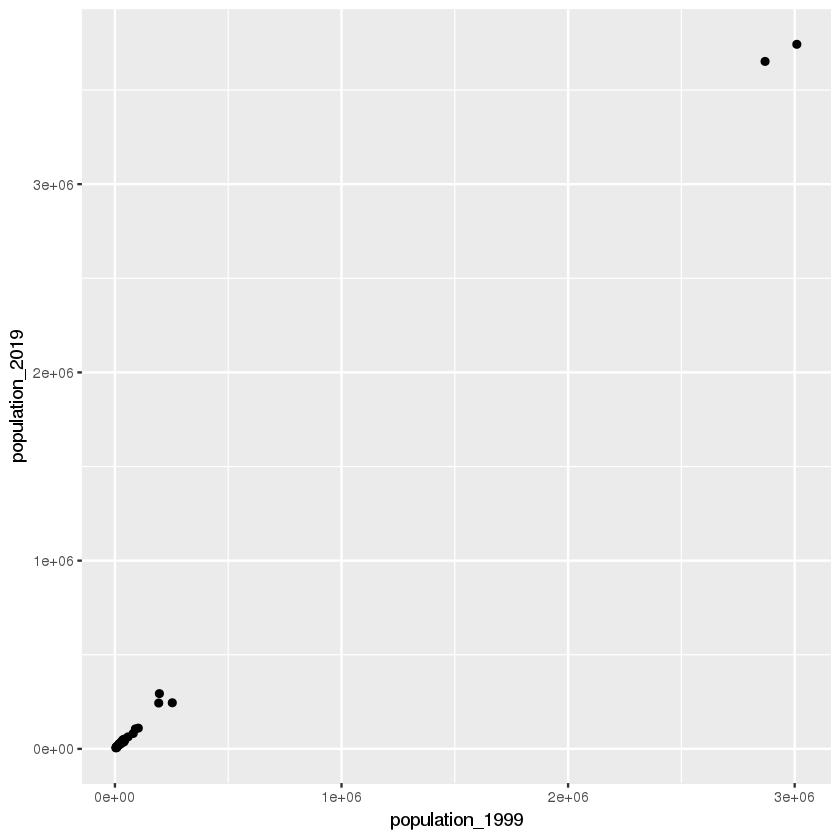

In [64]:
cities <- read.csv('Data/cities.txt',sep="\t") # what happens if the +++,sep="\t"+++ option is removed?  
str(cities)
summary(cities)
library(ggplot2)
qplot(population_1999,population_2019,data=cities) 

Evidently, the dataset consists of the populations of 37 cities, in 1999 and in 2019; 2 of which are classified as **large**, 6 as **medium** and 29 as **small**. Does this make sense to you? Are the classifications constant over the 20 year interval? 

Summary statistics can also be gleamed from the `describe()` function (loaded with the `psych` package). 

In [5]:
library(psych)
describe(cities[,2:3])


Attaching package: ‘psych’

The following object is masked _by_ ‘.GlobalEnv’:

    cities



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
population_1999,1,37,201090.8,666239.4,29500,41693.23,30274.69,4590,3009490,3004900,3.744705,12.49076,109529.1
population_2019,2,37,249796.5,838340.9,31160,49518.39,28199.05,5090,3742940,3737850,3.746101,12.48192,137822.4


The statistics by groups can be obtained by first separating the data into 3 subsets (that's not the only way to do this, of course... we'll re-visit at a later stage in this module):

In [16]:
cities_large <- subset(cities, category=="large") # note the "==", instead of simply "="
summary(cities_large)
describe(cities_large[,2:3])

   category population_1999   population_2019  
 large :2   Min.   :2869350   Min.   :3652020  
 medium:0   1st Qu.:2904385   1st Qu.:3674750  
 small :0   Median :2939420   Median :3697480  
            Mean   :2939420   Mean   :3697480  
            3rd Qu.:2974455   3rd Qu.:3720210  
            Max.   :3009490   Max.   :3742940  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
population_1999,1,2,2939420,99093.94,2939420,2939420,103885.8,2869350,3009490,140140,0,-2.75,70070
population_2019,2,2,3697480,64290.15,3697480,3697480,67399.0,3652020,3742940,90920,0,-2.75,45460


In [17]:
cities_medium <- subset(cities, category=="medium")
summary(cities_medium)
describe(cities_medium[,2:3])

   category population_1999  population_2019 
 large :0   Min.   : 80720   Min.   : 81750  
 medium:6   1st Qu.: 93658   1st Qu.:107170  
 small :0   Median :148265   Median :176750  
            Mean   :152875   Mean   :179953  
            3rd Qu.:195575   3rd Qu.:244448  
            Max.   :253200   Max.   :293480  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
population_1999,1,6,152875.0,70933.87,148265,152875.0,78459.19,80720,253200,172480,0.19463840,-1.973643,28958.63
population_2019,2,6,179953.3,90642.84,176750,179953.3,102751.59,81750,293480,211730,0.06759059,-2.144774,37004.78


In [18]:
cities_small <- subset(cities, category=="small")
summary(cities_small)
describe(cities_small[,2:3])

   category  population_1999 population_2019
 large : 0   Min.   : 4590   Min.   : 5090  
 medium: 0   1st Qu.: 8430   1st Qu.:11060  
 small :29   Median :20520   Median :25000  
             Mean   :22216   Mean   :26476  
             3rd Qu.:30900   3rd Qu.:37120  
             Max.   :58080   Max.   :63730  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
population_1999,1,29,22216.21,14378.98,20520,21321.2,17924.63,4590,58080,53490,0.5562011,-0.6781139,2670.110
population_2019,2,29,26475.52,16402.64,25000,25597.6,20667.44,5090,63730,58640,0.4088084,-0.9556398,3045.894


Let's start by picking a sample of size 10 for the data. 

In [53]:
set.seed(2)
N=dim(cities)[1]
n=10
(cities_SRS = cities[sample(1:N,n, replace=FALSE),])

,category,population_1999,population_2019
7,small,7960,10050
26,small,40940,49040
21,small,29930,31160
6,small,7940,6780
32,medium,103190,110110
31,medium,90480,106190
5,small,7300,7320
36,large,2869350,3652020
14,small,18990,23170
16,small,21130,27840


For each year, the SRS estimate for $\mu$ is given simply by computing the mean of the population in the sample: 

In [48]:
(mean_SRS=sapply(Filter(is.numeric, cities_SRS), mean))

population_1999 population_2019 
         319721          402368

Under SRS, the bound on the error is given by $$B=2\sqrt{\frac{s^2}{n}(1-\frac{n}{N})},$$ where $s$ is the standard deviation of the sample, $n$ the sample size, and $N$ the population size:

(sd_SRS=sapply(Filter(is.numeric, cities_SRS), sd))
(bound_SRS = 2*sqrt(sd_SRS^2/n*(1-n/N)))

Finally, the 95% C.I. is given by `mean_SRS` $\pm$ `bound_SRS`, which yields: 

In [60]:
(CI_SRS = cbind(mean_SRS-bound_SRS,mean_SRS+bound_SRS))

population_1999,-164629.1,804071.1
population_2019,-214858.7,1019594.7


That is, we would expect the mean population of the cities to fall between the lower bound and the upper bound obtained this way roughly 19 times out of every 20 times we sampled the data using SRS. 

This is undeniably the case with this sample (the true means were 201,091 in 1999 and 249,796 in 2019), but it lacks  entirely on the information scale (the confidence intervals are so wide as to include negative values!)

A tighter confidence interval can be built using **stratified random sampling** (StS); as advised, we shall pick a sample of size $n=10$ but we will allocate it according to the following rule: $(n_s,n_m,n_l)=(5,3,2)$ (this has the effect of guaranteeing that both large cities are selected in the sample). Note that we have $(N_s,N_m,N_l)=(29,6,2)$.

In [63]:
# compute the estimate and bound components from the "large" stratum
n_l=2
N_l=2
cities_large_StS = cities_large[sample(1:N_l,n_l, replace=FALSE),]
mean_large_SRS = sapply(Filter(is.numeric, cities_large_StS), mean)
sd_large_SRS = sapply(Filter(is.numeric, cities_large_StS), sd)
bound_large_SRS = 1/N^2*N_l^2*sd_large_SRS^2/n_l*(1-n_l/N_l)

# compute the estimate and bound components from the "medium" stratum
n_m=3
N_m=6
cities_medium_StS = cities_medium[sample(1:N_m,n_m, replace=FALSE),]
mean_medium_SRS = sapply(Filter(is.numeric, cities_medium_StS), mean)
sd_medium_SRS = sapply(Filter(is.numeric, cities_medium_StS), sd)
bound_medium_SRS = 1/N^2*N_m^2*sd_medium_SRS^2/n_m*(1-n_m/N_m)

# compute the estimate and bound components from the "small" stratum
n_s=5
N_s=29
cities_small_StS = cities_small[sample(1:N_s,n_s, replace=FALSE),]
mean_small_SRS = sapply(Filter(is.numeric, cities_small_StS), mean)
sd_small_SRS = sapply(Filter(is.numeric, cities_small_StS), sd)
bound_small_SRS = 1/N^2*N_s^2*sd_small_SRS^2/n_s*(1-n_s/N_s)

# compute the StS esimate and bound
(mean_StS = N_l/N*mean_large_SRS + N_m/N*mean_medium_SRS + N_s/N*mean_small_SRS)
bound_StS = 2*sqrt(bound_large_SRS + bound_medium_SRS + bound_small_SRS)

# derive the StS 95% CI
(CI_StS = cbind(mean_StS-bound_StS,mean_StS+bound_StS))

population_1999 population_2019 
       213199.9        267332.6

population_1999,199130.4,227269.5
population_2019,249192.2,285473.1


The 95% C.I. are much tighter (and incidentally, provide estimates that are closer to the true value, although that is secondary to the tightness of the intervals). 

---
[Back to top](#top)

## Data Wrangling <a name="wrangling"></a>

*EXERCISE:* What would the following dataset look like in a tidy format?

In [86]:
data = data.frame(cbind(c("Alex","Alex","Allison","Allison","Bobbie","Bobbie"),
                        c("wind","pressure","wind","pressure","wind","pressure")))

data = cbind(data,c(68,130,55,121,72,118))

colnames(data)=c("storm","stat","value")
data
str(data)

storm,stat,value
Alex,wind,68
Alex,pressure,130
Allison,wind,55
Allison,pressure,121
Bobbie,wind,72
Bobbie,pressure,118


'data.frame':	6 obs. of  3 variables:
 $ storm: Factor w/ 3 levels "Alex","Allison",..: 1 1 2 2 3 3
 $ stat : Factor w/ 2 levels "pressure","wind": 2 1 2 1 2 1
 $ value: num  68 130 55 121 72 118


*SOLUTION:* Tidy data is a structure for which each observation is in a row, and each variable in its own column. 

This can best be achieved using the `tidyr` function `spread()` (see section 9 of notebook `CSPS 04 R Basics.ipynb`) for details.

In [75]:
library(tidyr)
(data_tidy <- spread(data,stat,value))

storm,pressure,wind
Alex,130,68
Allison,121,55
Bobbie,118,72


*EXERCISE:* Provide a pivot table for the mean and standard deviation of the `wind` and the `pressure` variables.

*SOLUTION:* This can be done using the `dplyr` function `summarise()`. 

In [90]:
library(dplyr)

wind = summarise(data_tidy, mean=mean(as.numeric(wind)), sd=sd(as.numeric(wind)))
pressure = summarise(data_tidy, mean=mean(as.numeric(pressure)), sd=sd(as.numeric(pressure)))

pivot = rbind(wind,pressure)
pivot = cbind(c("wind","pressure"),pivot)

colnames(pivot)[1] = "stat"

pivot

stat,mean,sd
wind,65,8.888194
pressure,123,6.244998


*EXERCISES:* Turn the data found in `cities.txt` into a tidy dataset. 

*SOLUTIONS:* The `cities.txt` data is not in a tidy format since population values are found in two different columns; `tidyr`'s `gather()` (whose syntax is a little bit daunting) can help. 



In [101]:
cities <- read.csv('Data/cities.txt',sep="\t")
cities = cbind(1:37,cities) # to identify the cities
colnames(cities) <- c("city","category","1999","2019") # to improve readabilit 
str(cities) # to get one last look at the data in non-tidy format

library(tidyr)
(cities_tidy <- gather(cities,key="year", value="population", 3:4)) 
                # gather the information from the city dataset found in the 3rd and 4th column (1999, 2019)

'data.frame':	37 obs. of  4 variables:
 $ city    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ category: Factor w/ 3 levels "large","medium",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ 1999    : int  4590 5210 6030 6580 7300 7940 7960 8430 8750 9080 ...
 $ 2019    : int  5090 7090 7710 8120 7320 6780 10050 11060 12140 12480 ...


city,category,year,population
1,small,1999,4590
2,small,1999,5210
3,small,1999,6030
4,small,1999,6580
5,small,1999,7300
6,small,1999,7940
7,small,1999,7960
8,small,1999,8430
9,small,1999,8750
10,small,1999,9080
